### Demo MNIST 


In [16]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import numpy as np

**Data loading**

In [17]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


**Data plotting**

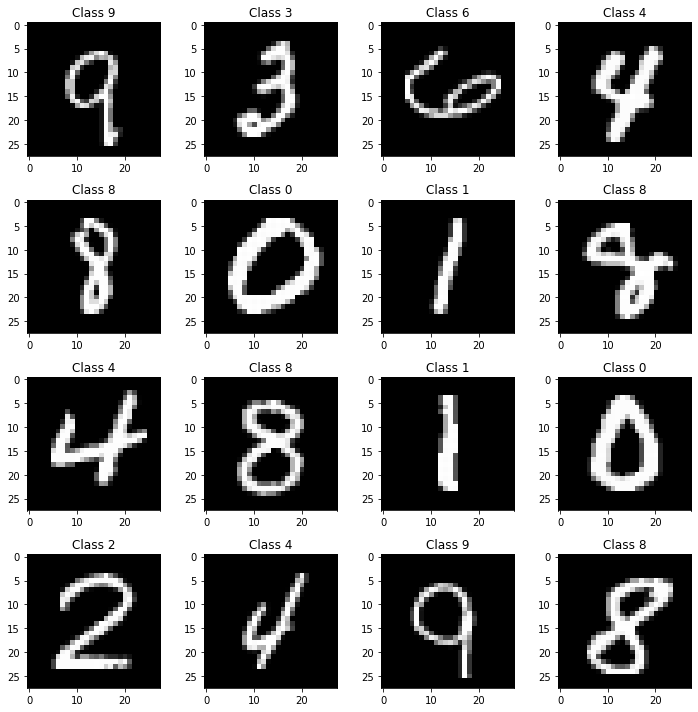

In [18]:
fig = plt.figure()
fig.set_size_inches(10, 10)
for i in range(16):
    plt.subplot(4,4,i+1)
    num = np.random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray')
    plt.title(f"Class {y_train[num]}")

plt.tight_layout()

**Data normalization :**

We normalize the train and test data such that each pixel is in [0, 1] (instead of [0, 255]). This usually helps the training !

In [19]:
X_train = X_train / 255
X_test = X_test / 255 

In [20]:
nb_classes = 10 # number of unique digits

# One hot encoding
Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)
print("Y_train shape", Y_train.shape)
print("Y_test shape", Y_test.shape)

Y_train shape (60000, 10)
Y_test shape (10000, 10)


### **Fully connected network**

Create a fully connected network with :
- Two layers with 512 ouput neurons and ReLu activation.
- A final layer with 10 output neurons and a solftmax activation.

Hint : You will need to flatten your image before the first dense layer. Use [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten)



In [21]:
## To-do
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='softmax'))

Train for 5 epochs :

In [22]:
## To-do
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=128, epochs=5, validation_data=(X_test, Y_test))

Epoch 1/5


ValueError: ignored

### **Convolutional Neural Network**

Create a Convolutional Neural Network. You will need to use [tf.keras.layers.Flatten](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten) between the convolutional layers and the fully connected layers.

In [ ]:
X_train = X_train.reshape(60000, 28, 28, 1) # add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

###  Architecture :
- Two convolutional layers with 32 channels, ReLu activation and 3 by 3 kernels.
- 2 by 2 max pooling
- Two convolutional layers with 64 channels, ReLu activation and 3 by 3 kernels.
- 2 by 2 max pooling
- One dense layer with 512 ouput neurons and ReLu activation
- A dense layer with 10 output neurons and a solftmax activation.


In [ ]:
## To-do
modelConv = models.Sequential([
      Conv2d(32, (3, 3), activation = 'relu', padding = 'valid', input_shape = (28, 28, 1)),                 
      Conv2d(32, (3, 3), activation = 'relu', padding = 'valid'),  
      MaxPooling2D(pool_size = (2,2)),
      Conv2d(64, (3, 3), activation = 'relu', padding = 'valid',)
      Conv2d(64, (3, 3), activation = 'relu', padding = 'valid',)                       
      MaxPooling2D(pool_size = (2,2)),
      Flatten()
      Dense(512, activation = 'relu')
      Dense(10, activation 'softmax')
                     
                               ])

Train for 5 epochs :

In [ ]:
## To-do
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = modelConv.fit(X_train, Y_train, batch_size=128, epochs=20, validation_data=(X_test, Y_test))

### Check predictions

Plot a few misclassified images.

In [ ]:
## To-do
plt.plot(history.history['loss'])
plt.plot(history2.history['loss'])
print(ModelConv.predict(X_test[:,:,:,None]))

